# Laboratory practice 2.1: Introduction to ML techniques
# Preparing the dataset

For this practice, you will need the following dataset:

- **SimData.dat**: synthetic datasets containing several input variables and one output variable **Y**.

One of the core packages for machine learning in Python is **scikit-learn**. However, most of the time you *will not be so lucky as to use it* other than to check your answers, since the main idea here is that **you** learn how to code each method and how/why it works. *This goes both for different algorithms as well as preprocessing and analysis techniques*.

Further reading on the scikit-learn library (this will be your best friend in the near future, but again, for now is just for reference):
- [scikit-learn](https://scikit-learn.org)

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
- Plotting (you do not have to use both, you can choose one or the other if you feel confortable):
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)


---

In [2]:
# Load the necessary modules

# plotting libraries (you can use only one, for example plt)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries (you'll need both here)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries (just so you see how some things can be done, although you may not use it too much)
from sklearn.model_selection import train_test_split

---

## STEP 1: IMPORT DATASET

In [3]:
# For starters, load the dataset here into a pandas dataframe called "df" and check the first rows with .head()
df = pd.read_csv("SimData.dat", sep = "\t")
df.head(10)

,X1,X2,Y
0,-64.170401,NaN,NO
1,604.457235,-4.703332,YES
2,492.688339,-0.493488,YES
3,438.040887,-2.307669,NO
4,184.349042,2.680303,NO
5,557.127451,-3.632923,YES
6,35.917131,-5.586183,YES
7,516.331830,-2.833074,YES
8,468.145842,2.075219,YES
9,4.001545,-3.325045,NO


In [4]:
df.describe() 

,X1,X2
count,998.000000,997.000000
mean,183.072472,-0.350102
std,238.413025,4.937561
min,-388.231360,-10.936124
25%,13.034723,-4.097245
50%,180.989524,-0.417009
75%,369.520148,3.541590
max,697.909378,10.558342


Is it a regression or a classification problem? Take into account that the target variable is "Y"

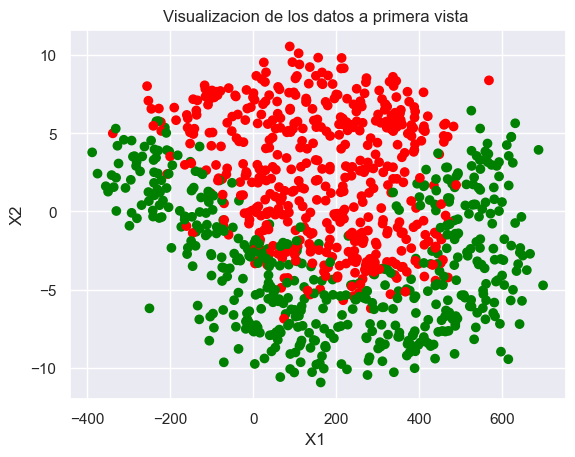

In [5]:
# Taking into account the shape of the dataset, plot it so that you can get acquainted with the data
# Make sure every class is distinguished using different colors and/or shapes in the plot

""" Es un problema de clasificación, en el que según el input (x1 y x2, variables continuas ), obtenemos una etiqueta y =YES / NO """

#cogemos las 3 columnas como numpy para poder scatearlo 
x1 = np.array(df.X1) 
x2 = np.array(df.X2) 

colors = [ "red" if i == "NO" else "green" for i in df.Y ] #decimos que sea rojo en NO y verde en SI 


#ploteamos los datos -> creamos el scatter con los datos y la leyenda 
plt.scatter(x1, x2, c = colors )
plt.title('Visualizacion de los datos a primera vista ')
plt.xlabel('X1 ')
plt.ylabel('X2')
plt.show()

## STEP 2: CHECK OUT THE MISSING VALUES

In [6]:
# Are there any missing values? How many? Where? 
print ( df.isna().sum()) 

""" Vemos que hay 2 datos faltantes en X1, 3 en X2 y 1 en Y -> tenemos que manejarlos """

X1    2
X2    3
Y     1
dtype: int64


' Vemos que hay 2 datos faltantes en X1, 3 en X2 y 1 en Y -> tenemos que manejarlos '

In [7]:
# In this case we will simply remove the missing values by removing the rows with NAs. Do this here.
df = df.dropna(subset= "X1")
df = df.dropna(subset= "X2")
df = df.dropna(subset= "Y")

# Check results. Was your removal succesful?
print ( df.isna().sum()) 

""" Vemos que ya tenemos los NA quitados, por lo que el siguiente paso es ver los outliers """

X1    0
X2    0
Y     0
dtype: int64


' Vemos que ya tenemos los NA quitados, por lo que el siguiente paso es ver los outliers '

## STEP 3: PLOT THE DATA AND CHECK OUT FOR OUTLIERS

In [8]:
# Check your main statistics for the data variables and see if everything is clear
df.describe() 

,X1,X2
count,996.000000,996.000000
mean,183.233656,-0.348326
std,238.507874,4.939723
min,-388.231360,-10.936124
25%,13.424622,-4.105678
50%,180.989524,-0.416657
75%,369.618619,3.544763
max,697.909378,10.558342


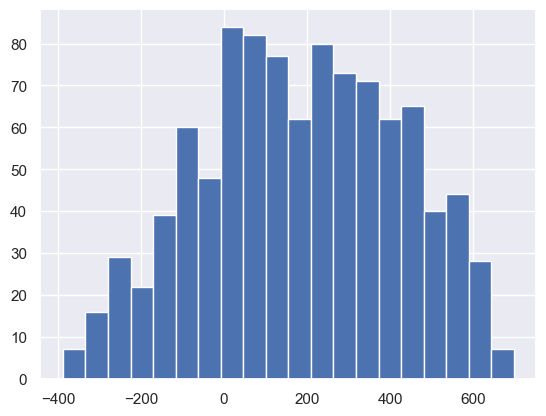

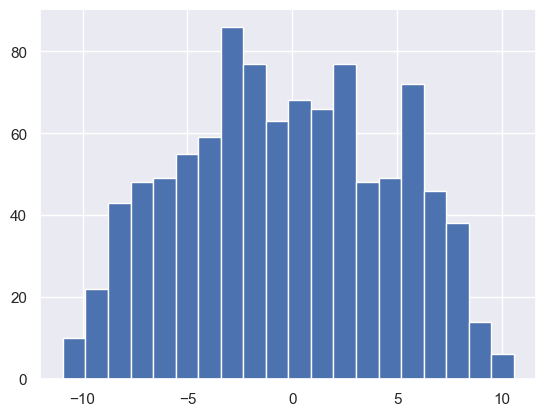

' A primera vista, no vemos que haya ningún outlier '

In [9]:
# Plotting is a good way to get to know the data. Do a histogram for each variable to see its behavior.

plt.hist(np.array(df["X1"]), bins = 20)
plt.show() 

plt.hist(np.array(df["X2"]), bins = 20 )
plt.show() 
# Do you see any potential outliers you should take care of?
""" A primera vista, no vemos que haya ningún outlier """


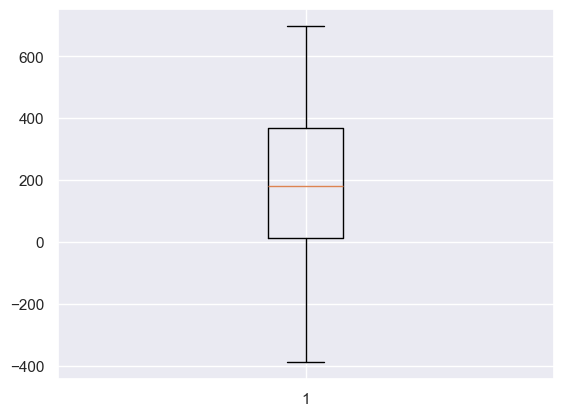

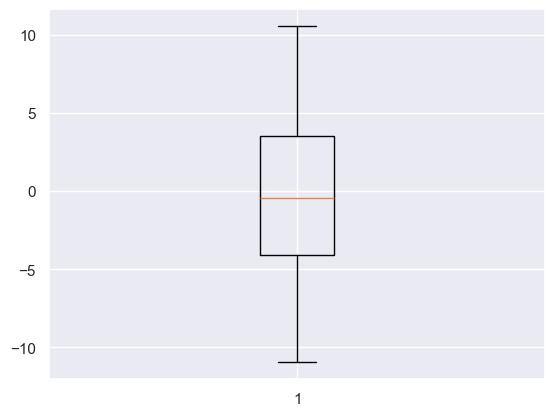

In [10]:
plt.boxplot(np.array(df.X1))
plt.show() 

plt.boxplot(np.array(df.X2))
plt.show() 

## STEP 4: ENCODE CATEGORICAL VARIABLES

In [11]:
# Are there any categorical input variables? If unsure, check it

df.dtypes

X1    float64
X2    float64
Y      object
dtype: object

In [12]:
# Convert output variable to a factor (other types of numeric values are okay as well, but we will use this here)
print (df.head(10))
print(df["Y"].unique()) 


            X1        X2    Y
1   604.457235 -4.703332  YES
2   492.688339 -0.493488  YES
3   438.040887 -2.307669   NO
4   184.349042  2.680303   NO
5   557.127451 -3.632923  YES
6    35.917131 -5.586183  YES
7   516.331830 -2.833074  YES
8   468.145842  2.075219  YES
9     4.001545 -3.325045   NO
11   34.151772 -2.397937  YES
['YES' 'NO']


In [13]:

""" Hacemos un dump encoding -> Ponemos los YES a 1, y los NO a 0"""
columna_cambiada = df["Y"].apply(lambda x: 1 if x=="YES" else 0)
df["Y"] = columna_cambiada

print(df.head(20)) 

            X1        X2  Y
1   604.457235 -4.703332  1
2   492.688339 -0.493488  1
3   438.040887 -2.307669  0
4   184.349042  2.680303  0
5   557.127451 -3.632923  1
6    35.917131 -5.586183  1
7   516.331830 -2.833074  1
8   468.145842  2.075219  1
9     4.001545 -3.325045  0
11   34.151772 -2.397937  1
12  138.971608 -3.516589  1
13 -227.493511  6.586134  0
14  105.413488 -3.192428  1
15   -9.788238 -6.378898  1
16  -75.278341 -4.445818  1
17  452.940410 -1.751873  0
18  379.986714 -4.330865  1
19  472.899368  0.850045  1
20   38.517402 -0.817837  1
21 -239.198510  2.511377  1


## STEP 5: Standardize the numerical variables

In [14]:
# Are the numerical variables in the same scale? If unsure, check it

df.describe()

,X1,X2,Y
count,996.000000,996.000000,996.000000
mean,183.233656,-0.348326,0.501004
std,238.507874,4.939723,0.500250
min,-388.231360,-10.936124,0.000000
25%,13.424622,-4.105678,0.000000
50%,180.989524,-0.416657,1.000000
75%,369.618619,3.544763,1.000000
max,697.909378,10.558342,1.000000


In [15]:
""" Vemos que tenemos dos variables con escalas muy distintas , X1 va de -388.23 hasta 698.90 , pero X2 va sólo de -10.9 a 10.56"""
""" Por tanto, es importante standarizar las variables de input """

' Por tanto, es importante standarizar las variables de input '

The standardization should be done **after** we perform the train/test split, using only the mean and variance for the training dataset. In this case however, we will forget about this and just do it here, although this is something to keep in mind.

In [16]:
# Standardize the numerical variables. 
df_estandarizado = df.copy() 


def estandarizar (columna: str): 
    media = df[columna].mean() 
    desviacion = df[columna].std()
    df_estandarizado[columna] =  df_estandarizado[columna].apply(lambda x: float (( float(x) - media) / desviacion ))
# Watch out!: Save the mean and variance so you can undo de standardization anytime you want to

estandarizar ("X1")
estandarizar ("X2")


In [17]:
# Check if your process worked

df_estandarizado.describe() 


,X1,X2,Y
count,9.960000e+02,9.960000e+02,996.000000
mean,8.917454e-17,-1.783491e-18,0.501004
std,1.000000e+00,1.000000e+00,0.500250
min,-2.396001e+00,-2.143399e+00,0.000000
25%,-7.119641e-01,-7.606403e-01,0.000000
50%,-9.409048e-03,-1.383306e-02,1.000000
75%,7.814625e-01,7.881188e-01,1.000000
max,2.157898e+00,2.207951e+00,1.000000


In [18]:
""" Vemos que para X1 y X2, la media es 0 y la desviacion estandar es 1 -> tenemos ambas variables estandarizadas  """

' Vemos que para X1 y X2, la media es 0 y la desviacion estandar es 1 -> tenemos ambas variables estandarizadas  '

## STEP 6: EXPLORATORY ANALYSIS
Inside the exploratory analysis, feel free to play with the data to get to know it further. Some of the best ways to do so is plotting it, showing the correlation plot of numeric variables, etc.

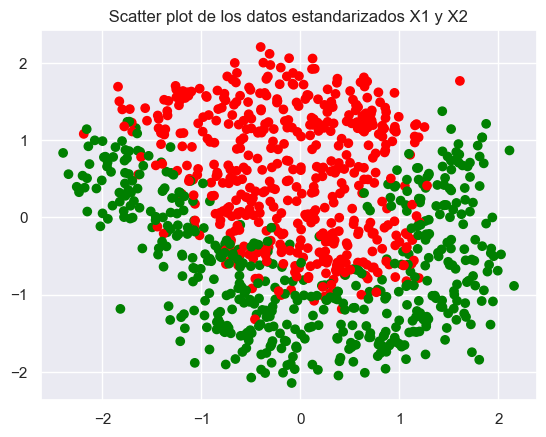

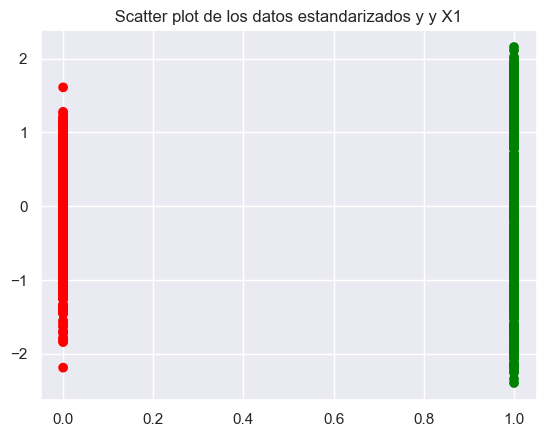

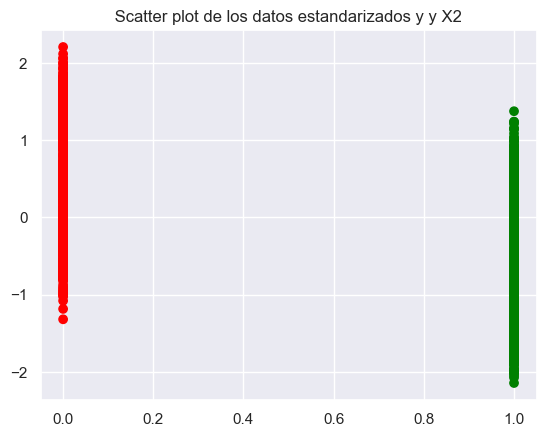

In [19]:
# Do again the scatterplot for the dataset, but now with the processed version

x1 = np.array(df_estandarizado["X1"]) 
x2 = np.array(df_estandarizado["X2"])
y = np.array ( df_estandarizado["Y"])
colors = ["red" if i== 0 else "green" for i in df_estandarizado["Y"]]

i = 0 
for (fila, columna ) in [(x1, x2), (y, x1), (y, x2)]:
    plt.scatter(fila, columna , c = colors )
    if i == 0 : 
        plt.title ( " Scatter plot de los datos estandarizados X1 y X2 ")
    elif i == 1: 
        plt.title ( " Scatter plot de los datos estandarizados y y X1 ")
    else: 
        plt.title ( " Scatter plot de los datos estandarizados y y X2 ")
    plt.show() 
    i+=1 


In [20]:
# One idea: perform a scatterplot where you face each variable against each other (all vs. all)


In [21]:
# Obtain and plot the correlation matrix 
# For this, you may want to use the .corr() method in pandas
df.corr() 


,X1,X2,Y
X1,1.000000,-0.189912,0.070976
X2,-0.189912,1.000000,-0.559032
Y,0.070976,-0.559032,1.000000


In [22]:
# Feel free to try any other exploration methods here!

## STEP 7: CHECK OUT FOR CLASS IMBALANCES

Are both classes balanced or not?

In [23]:
# Count instances for each class
df["Y"].value_counts()

Y
1    499
0    497
Name: count, dtype: int64

In [24]:
""" Vemos que tenemos aproximadamente el mismo numero de etiquetas (NO y YES) """

' Vemos que tenemos aproximadamente el mismo numero de etiquetas (NO y YES) '

If both classes are kind of similar in number, you can consider the dataset _balanced_

## STEP 8: SPLIT THE DATA INTO TRAINING AND TEST SETS

Now, this is a critical point, and you should watch out here. Doing this properly is not difficult, but mistakes are expensive in this step! (and also you most likely will not notice them until much later, when it's already very far too late)

In [25]:
# Define input and output variables

input = x1, x2 
output = y 

In [39]:
# First: Shuffle the data (check out the .sample() method in pandas)

df_shuffleado = df.sample(n = df.shape[0])


# Then, separate the inputs, stored in "X" (pd.dataframe) from the target variable, stored in "y" (pd.series)
X = pd.DataFrame({"X1" : df_shuffleado["X1"], "X2" : df_shuffleado["X2"]})
Y = pd.Series(df_shuffleado["Y"])

             X1        X2  Y
499 -238.221137  1.038154  1
740   40.605698  1.130962  0
701  145.790664 -4.368218  1
393  -35.988759 -1.728007  1
729  386.326928  3.814629  0
(996, 2)


Now for the crucial part: Separate the train and test datasets. 

For now, consider only train/test (forget the validation dataset) and make it so that the training set contains 80% of the data and the test set the remaining 20%


In [48]:
# How many rows will the training dataset have?
num_rows = X.shape[0] * 80 // 100
num_rows

796

In [49]:
# Perform the split
X_entrenamiento = X[0: num_rows]
Y_entrenamiento = Y[0: num_rows]



In [53]:
# Check whether the shape of all dataframes is correct
print (X_entrenamiento.shape)
print(Y_entrenamiento.shape)


(796, 2)
(796,)


In [55]:
# See how convenient sklearn becomes here, for example...

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,  # percentage of test data
                                                    random_state=0, # seed for replication
                                                    stratify = y)   # Preserves distribution of y



,X1,X2
406,107.378782,-7.389331
348,319.888683,5.754181
971,83.377934,-7.290793
95,373.761896,-8.265290
244,262.710059,-1.344082
...,...,...
606,507.168168,-5.347802
797,151.686186,5.398054
236,342.131637,-7.288121
21,-239.198510,2.511377


### 8.1 - Plot the train and test datasets
We'll do this simple check to see if everything looks fine here

In [60]:
# To make plotting easier, group together train data and test data

data_train = pd.DataFrame({"X1": X_train["X1"], "X2": X_train["X2"], "Y" : y_train})
data_test = pd.DataFrame({"X1": X_test["X1"], "X2": X_test["X2"], "Y" : y_test})


# Plot the train and test datasets

print(data_train)
print (data_test )



             X1        X2  Y
406  107.378782 -7.389331  1
348  319.888683  5.754181  0
971   83.377934 -7.290793  1
95   373.761896 -8.265290  1
244  262.710059 -1.344082  0
..          ...       ... ..
606  507.168168 -5.347802  1
797  151.686186  5.398054  0
236  342.131637 -7.288121  1
21  -239.198510  2.511377  1
721 -208.976868  1.501237  1

[796 rows x 3 columns]
             X1        X2  Y
136 -115.248635  7.353836  0
127  560.638654 -5.679244  1
414 -114.673045 -1.533353  1
259  109.781194 -6.674774  1
761  602.339940 -3.111906  1
..          ...       ... ..
466 -115.659343  7.840985  0
760 -272.799511  2.569798  1
527   28.044476  8.289244  0
286 -208.431752  3.928220  1
605  322.348964  6.712620  0

[200 rows x 3 columns]


In [61]:
# Store the train and test datasets to use it later
data_train.to_csv("train.dat", sep = "\t", index = False)
data_test.to_csv("test.dat", sep = "\t", index = False)

### **We are all set!** 

You can continue to the next practice, to start applying your first ML algorithm to the data: _K-nearest neighbors_

Also: any further checks of processing you think you need, feel free to try here!